# Data Exploration and Analysis

![DS_Process](./images/20_page.jpg)

![data_visualization](./images/21_page.jpg)

![data_visualization_2](./images/22_page.jpg)

![data_visualization_3](./images/23_page.jpg)

General advice:
- tailor your visualizations to the problem at hand
- look at your data - manually inspect it
- any kind of results summary can be useful
- people are good at spotting visual problems
- log data to text files, use notebooks to view from data on disk

Important visualization tools:
- matplotlib
- seaborn (wrapper around matplotlib)
- Plotly

## Types of charts

- line
- scatter
- histogram
- bar

## "Mistakes, we’ve drawn a few"
- The economist talks about how they could improve charts they made in the past

https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

### Truncating the scale

Putting break points in the scale distorts the chart

![](assets/truncating.png)

### Choosing scales to force relationships

![](assets/scales.png)

### Using a line chart to show trend

Instead use dots for the individual points, smoothed line for the trend

![](assets/trend.png)

## Matplotlib - a tale of three (?) API's
Matplotlib is one of the most well-known plotting libraries for python. However, at the beginning, it can be difficult to wrap your head around.

It has 3 different APIs (ways of writing code to draw graphs).

- MATLAB / state based interface
- object oriented 

The two main abstractions in matplotlib are the **Figure** and **Axes**
- Figure = final image (can have many Axes)
- Axes = individual plot


![](assets/mpl-faq.png)
[From the matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data to plot
kickstarter_projects = pd.read_csv("data/ks-projects-201801.csv", parse_dates=True)

In [3]:
kickstarter_projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### API One - `plt.plot()`

pyplot level

In this API, the figure is automatically created, and the `plt.` always refer to the most recent figure.

This is a quick and dirty way to make a plot.  

It is shown only for reference (and to be able to understand other peoples code). 

**It is not recommended.**

Text(0, 0.5, 'y-axis')

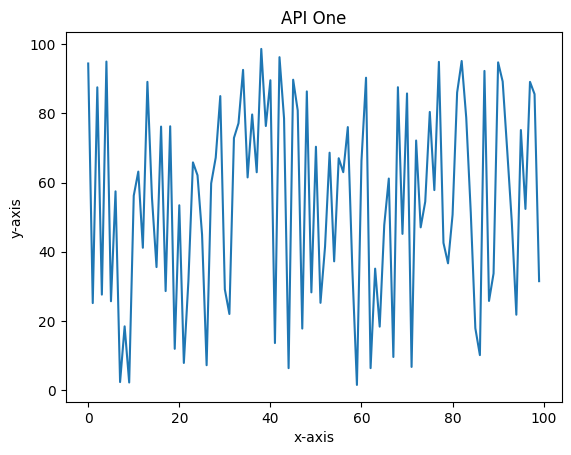

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(0, 100, size=100)
y = np.random.uniform(0, 100, size=100)
line = plt.plot(x)

#  to get access to the figure and axes objects
fig = plt.figure(1)
axes = fig.axes

#  common operations
plt.title('API One')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#plt.savefig('./one.png')

## API Two - `plt.subplots()`

The reccomended API
- more explicit & clear
- more typing
- multiple axes on the same figure
- more options

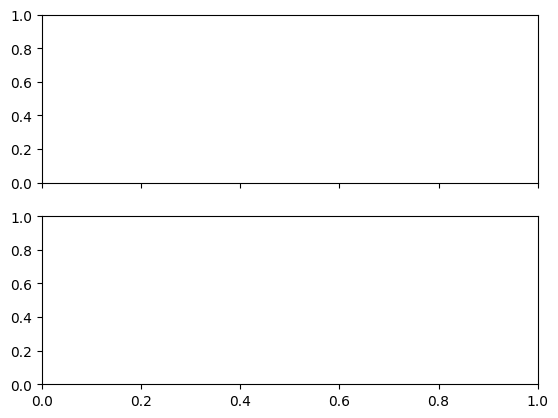

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

In [6]:
# using the subplot syntax to show change in project type over year

In [5]:
kickstarter_projects.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
kickstarter_projects.loc[:, "launched"] = pd.to_datetime(kickstarter_projects.loc[:, "launched"])
kickstarter_projects.loc[:, "deadline"] = pd.to_datetime(kickstarter_projects.loc[:, "deadline"])

In [7]:
# making new year column to filter on
kickstarter_projects.loc[:, "project_year"] = kickstarter_projects.loc[:, "deadline"].dt.year

In [8]:
kickstarter_projects.groupby("project_year")["ID"].count()

project_year
2009      902
2010     9098
2011    25107
2012    41560
2013    44178
2014    66231
2015    77498
2016    58074
2017    52741
2018     3272
Name: ID, dtype: int64

In [9]:
#year_2016_project_types = year_2016.groupby("main_category").count()

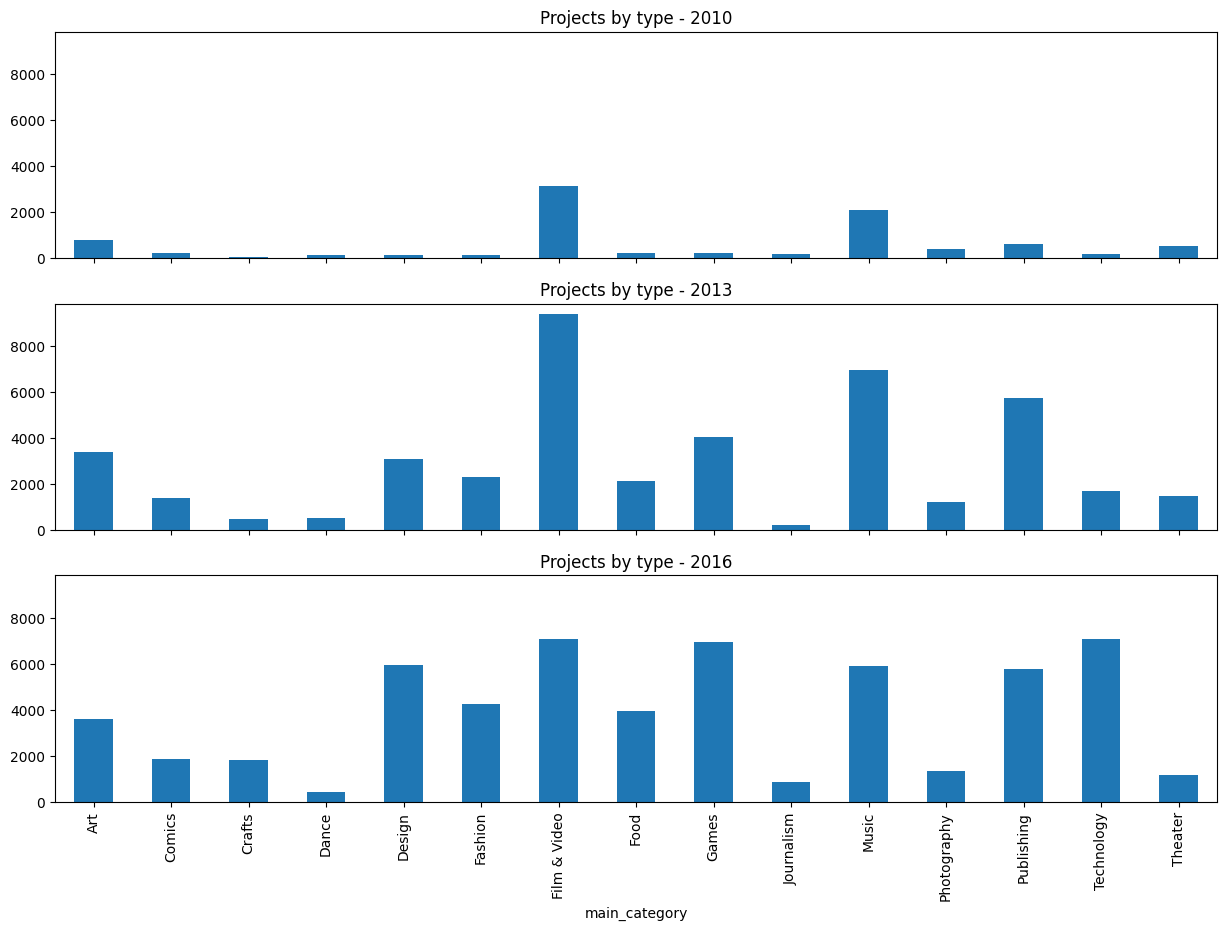

In [10]:
year_2010 = kickstarter_projects.loc[kickstarter_projects.loc[:, "project_year"]==2010]
year_2013 = kickstarter_projects.loc[kickstarter_projects.loc[:, "project_year"]==2013]
year_2016 = kickstarter_projects.loc[kickstarter_projects.loc[:, "project_year"]==2016]

year_2010_project_types = year_2010.groupby("main_category")["ID"].count()
year_2013_project_types = year_2013.groupby("main_category")["ID"].count()
year_2016_project_types = year_2016.groupby("main_category")["ID"].count()

fig, ax = plt.subplots(nrows=3, figsize=(15,10), sharex=True, sharey=True)

year_2010_project_types.plot(ax=ax[0], kind='bar')

year_2013_project_types.plot(ax=ax[1], kind='bar')

year_2016_project_types.plot(ax=ax[2], kind='bar')

ax[0].set_xlabel('')
ax[0].set_title('Projects by type - 2010')
ax[1].set_title('Projects by type - 2013')
ax[2].set_title('Projects by type - 2016')

fig;

### Exercise:
Plot the amount raised by successful and unsuccessful projects over time.

The `axes` object is a `np.array`:

In [15]:
axes[0]

<AxesSubplot:>

## API Three - `df.plot()`

Combination of pandas

In [11]:
tech_df = kickstarter_projects.loc[kickstarter_projects.loc[:, "main_category"]=="Technology"]
sub_categories_tech = pd.DataFrame(tech_df.groupby("category")["ID"].count().sort_values(ascending=False)[1:])
sub_categories_tech.rename(columns={"ID":"Tech Type"}, inplace=True)

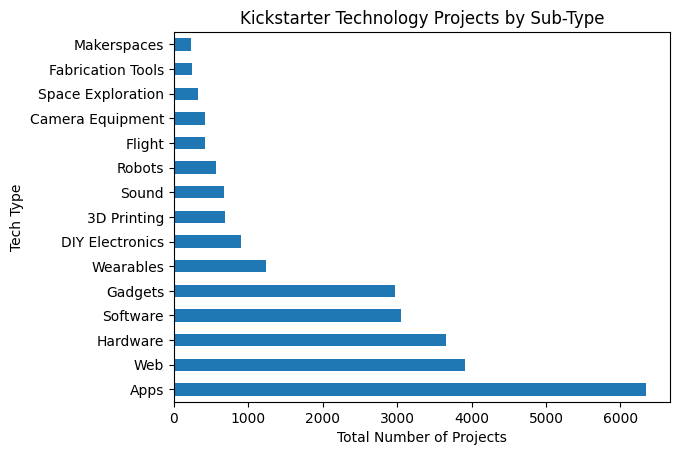

In [12]:
ax = sub_categories_tech.plot(kind='barh')
ax.legend().set_visible(False)
ax.set(title='Kickstarter Technology Projects by Sub-Type', 
       xlabel='Total Number of Projects', ylabel='Tech Type');

## Changing plot style

In [18]:
plt.style.available
plt.style.use('ggplot')

##### Saw this used and loved it -- https://docs.profiling.ydata.ai/latest/

### References

[Effectively Using matplotlib](https://pbpython.com/effective-matplotlib.html)

[matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html)

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)